In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
import imageio
from ipywidgets import interact

In [20]:
np.random.seed(42)

countries = [f"Country_{i+1}" for i in range(15)]
iterations = 25

data = {}
for c in countries:
    start = np.random.uniform(60, 120)
    # larger and more varied drops
    drops = np.random.uniform(0, 8, size=iterations).cumsum()
    values = np.maximum(start - drops, 0)
    data[c] = values

avgConnectivityDf = pd.DataFrame(data)

rankDf = avgConnectivityDf.rank(axis=1, ascending=False, method="min")

rankDf

columns = avgConnectivityDf.columns
colors = sns.color_palette("turbo", len(columns))

col_dict = {columns[i] : colors[i] for i in range(len(columns))}

In [21]:
def get_top10(avgConnectivityDf:pd.DataFrame, rankDf:pd.DataFrame, n: int, from_start= False):
    
    # set start of the slicing
    if from_start:
        start = 0
    else:
        start = n-5
    
    # only keep countries that are in the top10 at any point
    for col in avgConnectivityDf.columns:
        if min(rankDf[col].values) > 10:
            rankDf.drop(col, axis= 1, inplace= True)
            avgConnectivityDf.drop(col, axis= 1, inplace= True)

    # only get data for chosen period
    idx = list(range(start, n))
    conn_df = pd.DataFrame(avgConnectivityDf.loc[idx])

    # sort by the last relevant iteration so that the legend is in order
    return conn_df.T.sort_values(by= n-1, axis= 0, ascending= False)

def visualizeResults(avgConnectivityDf:pd.DataFrame, rankDf:pd.DataFrame, from_start= False):
    
    # list to store frames, one frame per slider value
    frames = []
    slider_values = range(5, len(avgConnectivityDf)+1)

    # map country to color
    columns = avgConnectivityDf.columns
    colors = sns.color_palette("turbo", len(columns))

    col_dict = {columns[i] : colors[i] for i in range(len(columns))}

    # iterate through slider values
    for n in slider_values:

        # new plot each time
        fig, ax = plt.subplots(figsize= (10, 7))
        
        # get entries    
        conn_df = get_top10(avgConnectivityDf, rankDf, n, from_start)
        
        # set start
        if from_start:
            start = 0
        else:
            start = n-5

        ax.grid(alpha= 0.3)
        
        # keep track of minimum connectivity to adjust graph lines
        min_pos_conn = np.inf
        
        # plot lines
        idx = list(range(start, n))
        for i, (_, r) in enumerate(conn_df.iterrows()):
            
            # use top10 of final iteration to label countries
            if i < 10:
                min_conn_row = r.values.min()
                if (min_conn_row <= min_pos_conn):
                    min_pos_conn = min_conn_row
                l = f"{i+1}. {r.name}"
            
            # no label for countries outside of the top10
            else:
                l = None

            ax.plot(list(range(len(idx))), r.values, marker= 'o', label= l, c= col_dict[r.name])
        
        ax.set_xticks(list(range(len(idx))), idx)
        ax.set_ylim(bottom= min_pos_conn-1)
        ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))

        ax.set_ylabel("Connectivity")
        ax.set_xlabel("Iteration")
        ax.set_title(f"Top 10 countries by connectivity.\nFrom iteration {start} to {n-1}.")
        fig.tight_layout()
 
        # save frame
        fig.canvas.draw()
        renderer = fig.canvas.get_renderer()

        # magic ???
        image = np.asarray(renderer.buffer_rgba())[:, :, :3]

        # store frame, close plot
        frames.append(image)
        plt.close(fig)

    # save gif
    if from_start:
        name = "connectivity_top10_fromstart.gif"
    else:
        name = "connectivity_top10_slices.gif"

    imageio.mimsave(name, frames, fps=2)

visualizeResults(avgConnectivityDf, rankDf, from_start= True)
visualizeResults(avgConnectivityDf, rankDf, from_start= False)

In [22]:
def get_top10(n, from_start= False):
    
    if from_start:
        start = 0
    else:
        start = n-5

    
    
    # only keep countries that are in the top10 at any point
    for col in avgConnectivityDf.columns:
        if min(rankDf[col].values) > 10:
            rankDf.drop(col, axis= 1, inplace= True)
            avgConnectivityDf.drop(col, axis= 1, inplace= True)
    
    # only get data for chosen period
    idx = list(range(start, n))
    conn_df = pd.DataFrame(avgConnectivityDf.loc[idx])

    return conn_df.T.sort_values(by= n-1, axis= 0, ascending= False)

miao = get_top10(10, False)
miao

,5,6,7,8,9
Country_15,95.539294,95.393520,94.637976,89.173922,88.604413
Country_3,94.415503,91.812860,88.703442,86.532650,79.902749
Country_5,98.367942,97.078172,89.640590,83.175627,78.108397
Country_8,85.902908,83.968090,83.223268,76.045542,68.842197
Country_7,73.439395,69.153198,68.430880,61.748460,59.182219
Country_14,71.902589,66.975788,61.895039,61.532607,58.535706
Country_12,69.452136,66.570611,65.554127,61.376181,55.216232
Country_11,65.191434,59.571561,56.695632,54.346897,47.872008
Country_1,61.260699,54.331290,49.522370,43.857789,43.693113
Country_4,63.046269,60.444803,54.607953,49.507493,42.409792


interactive(children=(IntSlider(value=5, description='Iteration window', max=24, min=5), Checkbox(value=True, …

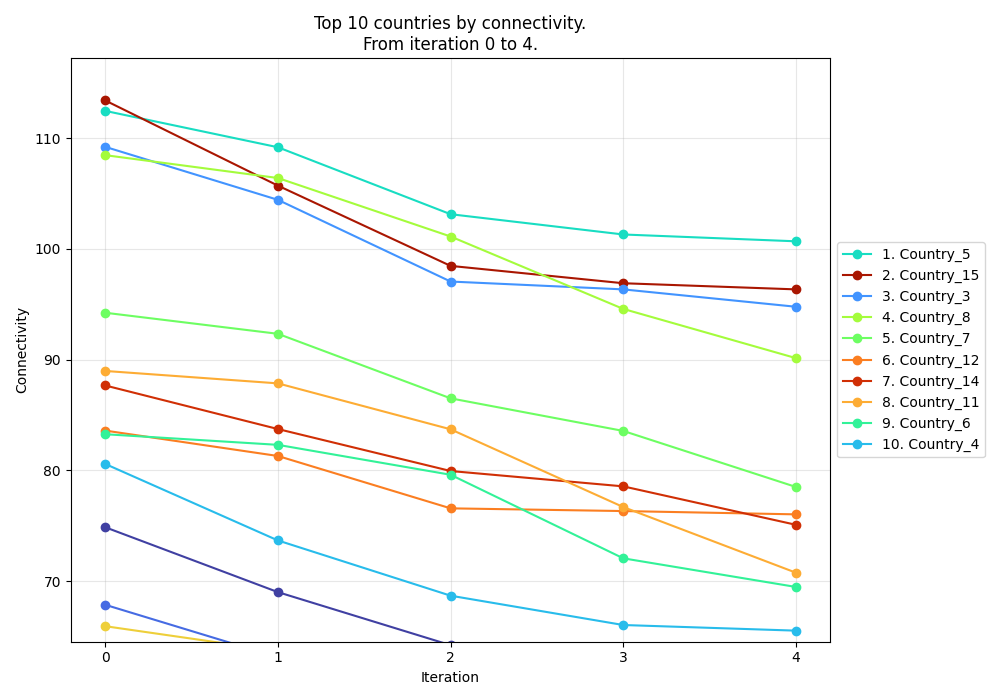

In [23]:
%matplotlib widget

fig, ax = plt.subplots(figsize= (10, 7))

def update_plot(n, from_start= True):

    # get entries    
    conn_df = get_top10(n, from_start)
    
    # set start
    if from_start:
        start = 0
    else:
        start = n-5

    ax.clear()
    ax.grid(alpha= 0.3)
    
    min_pos_conn = np.inf
    # plot lines
    idx = list(range(start, n))
    for i, (_, r) in enumerate(conn_df.iterrows()):
        # use top10 of final iteration to label countries
        if i < 10:
            min_conn_row = r.values.min()
            if (min_conn_row <= min_pos_conn):
                min_pos_conn = min_conn_row
            l = f"{i+1}. {r.name}"
        else:
            l = None
        ax.plot(list(range(len(idx))), r.values, marker= 'o', label= l, c= col_dict[r.name])
    
    ax.set_xticks(list(range(len(idx))), idx)
    ax.set_ylim(bottom= min_pos_conn-1)  # countries not in top10 have conn -2 : they 'exit the graph
    ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))

    ax.set_ylabel("Connectivity")
    ax.set_xlabel("Iteration")
    ax.set_title(f"Top 10 countries by connectivity.\nFrom iteration {start} to {n-1}.")
    fig.tight_layout()

    fig.canvas.draw_idle()


n_slider = widgets.IntSlider(value= 5, min= 5, max= len(avgConnectivityDf)-1, step= 1, description= 'Iteration window')

interact(update_plot, n= n_slider)
plt.show()